<a href="https://colab.research.google.com/github/Muskaan-Singh/Meeting-Data-Analytics/blob/main/Minuting_Datasets_Line_Info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import csv
from nltk.tag import pos_tag # for proper noun
from nltk.tokenize import word_tokenize, sent_tokenize
from statistics import median
import math
from copy import deepcopy

import os
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

stopWords = list(set(stopwords.words("english")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
path='/content/drive/MyDrive/Kaggle/Cpastone_text_minuting/ami/transcripts'
filelist=os.listdir(path)
transcripts={}
for file in filelist:
    with open(f'{path}/{file}', 'r') as f: 
        txt=f.read()
        transcripts[file.split('.')[0]]=txt

path='/content/drive/MyDrive/Kaggle/Cpastone_text_minuting/ami/summaries/extractive'
filelist=os.listdir(path)       
extractive_summary={}
for file in filelist:
    with open(f'{path}/{file}', 'r') as f: 
        txt=f.read()
        extractive_summary[file.split('.')[0]]=txt 
        
path='/content/drive/MyDrive/Kaggle/Cpastone_text_minuting/ami/summaries/abstractive'
filelist=os.listdir(path)       
abstractive_summary={}
for file in filelist:
    with open(f'{path}/{file}', 'r') as f: 
        txt=f.read()
        abstractive_summary[file.split('.')[0]]=txt

In [ ]:
inner_join_transcripts=deepcopy(transcripts)
inner_join_extractive_summary=deepcopy(extractive_summary)
inner_join_abstractive_summary=deepcopy(abstractive_summary)
l=list(transcripts.keys())

for i in l:
    if i not in inner_join_abstractive_summary:
        del inner_join_transcripts[i]
        if i in inner_join_extractive_summary:
            del inner_join_extractive_summary[i]
        continue
    if i not in inner_join_extractive_summary:
        del inner_join_transcripts[i]
        if i in inner_join_abstractive_summary:
            del inner_join_abstractive_summary[i]

def ami_mean(transcripts, small_threshold , big_threshold ):
    stopWords = list(set(stopwords.words("english")))
    count_small=0
    count_big=0
    sum_small=0
    sum_big=0
    position_small=[]
    position_big=[]
    total_sent=0
    total_words=0
    total_words_list=[]
    total_refined_words=0
    unique={}
    number=len(transcripts)
    total_unique_refined_words=0
    max_len=[]
    position_max_len=[]
    small_bool=[]
    turns=0
    for key in transcripts.keys():
        txt=nltk.sent_tokenize(transcripts[key])
        total_sent+=len(txt)
        m=0
        p=0
        tmp=0
        for index,sentence in enumerate(txt):
            temp=nltk.word_tokenize(sentence)
            sen_len=len(temp)
            m=max(m,sen_len)
            if m==sen_len:
                p=index/len(txt)
            temp=[word.lower() for word in temp]
            word_tokens_refined=[x for x in temp if x not in stopWords]
            for word in word_tokens_refined:
                if word not in unique: 
                    total_unique_refined_words+=1
                    unique[word]=1
                elif word in unique:
                    unique[word]+=1

            total_refined_words+=len(word_tokens_refined)
            total_words+=sen_len
            tmp+=sen_len

            
            if sen_len<small_threshold:
                count_small+=1
                sum_small+=sen_len
                position_small.append(index/len(txt))
                small_bool.append(1)
            elif sen_len>big_threshold:
                count_big+=1
                sum_big+=sen_len
                position_big.append(index/len(txt))
                small_bool.append(0)
            else:
                small_bool.append(0)
                
        max_len.append(m)
        position_max_len.append(p)
        total_words_list.append(tmp)

    # number of continuous occurances
    small_cont=0
    check=False
    for i in range(0,len(small_bool),4):
        if sum(small_bool[i:i+4])>=2:
            small_cont+=1
            check=False
        else:
            try: 
                if sum(small_bool[i:i+4])==1 and small_bool[i+3]==1:
                    check=True
                elif sum(small_bool[i:i+4])==1 and small_bool[i]==1 and check==True:
                    small_cont+=1
                    check=False            
            except:
                pass

    
    
    return (count_small, count_big, sum_small, sum_big, position_small, position_big, 
total_sent, total_words, total_refined_words, total_unique_refined_words, unique, number, max_len,
            position_max_len, small_cont, total_words_list)

(count_small_transcripts_ami, count_big_transcripts_ami, sum_small_transcripts_ami, 
sum_big_transcripts_ami, position_small_transcripts_ami, position_big_transcripts_ami, 
total_sent_transcripts_ami, total_words_transcripts_ami, total_refined_words_transcripts_ami,
total_refined_unique_words_transcripts_ami, unique_dict_transcripts_ami, number_transcripts_ami,
max_len_transcripts_ami, position_max_len_transcripts_ami, small_cont_transcripts_ami,
 total_words_list_transcripts_ami) = ami_mean(transcripts, 5 , 10)

(count_small_esum_ami, count_big_esum_ami, sum_small_esum_ami, 
sum_big_esum_ami, position_small_esum_ami, position_big_esum_ami, 
total_sent_esum_ami, total_words_esum_ami, total_refined_words_esum_ami,
total_refined_unique_words_esum_ami, unique_dict_esum_ami,number_esum_ami,
max_len_esum_ami, position_max_len_esum_ami,small_cont_esum_ami,
 total_words_list_esum_ami)  = ami_mean(extractive_summary, 5 , 10)

(count_small_asum_ami, count_big_asum_ami, sum_small_asum_ami, 
sum_big_asum_ami, position_small_asum_ami, position_big_asum_ami, 
total_sent_asum_ami, total_words_asum_ami, total_refined_words_asum_ami,
total_refined_unique_words_asum_ami, unique_dict_asum_ami,number_asum_ami,
max_len_asum_ami, position_max_len_asum_ami,small_cont_asum_ami,
 total_words_list_asum_ami) = ami_mean(abstractive_summary, 5 , 10)

In [ ]:
!git clone https://github.com/gcunhase/AMICorpusXML.git

Cloning into 'AMICorpusXML'...
remote: Enumerating objects: 9664, done.
remote: Total 9664 (delta 0), reused 0 (delta 0), pack-reused 9664
Receiving objects: 100% (9664/9664), 8.30 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [ ]:
"""## Calculate speakers """

path='/content/AMICorpusXML/data/ami-transcripts-speaker'
filelist=os.listdir(path)
ami_speakers=[]
for key in transcripts.keys():
    p=0
    for file in filelist:
        if file[:7]==key:
            p+=1
        elif file[:6]==key:
            p+=1
    ami_speakers.append(p)

# number of hours:
ami_hours=100  #from their website

"""## Calculate Turns"""

path='/content/AMICorpusXML/data/ami-transcripts-speaker'
filelist=os.listdir(path)
ami_turns=[]
for key in transcripts.keys():
    speakers=[0]*len(transcripts[key].split('.'))
    for file in filelist:
        if file.split('.')[0]==key:
            name=file.split('.')[1]
            with open(f'{path}/{file}', 'r') as f: 
                txt=f.read()
            for index,line in enumerate(transcripts[key].split('.')):
                if line in txt:
                    speakers[index]=name
    t=0
    for index in range(1,len(speakers)):
        if speakers[index-1]!=speakers[index]:
            t+=1
    ami_turns.append(t)

In [ ]:
!git clone https://github.com/saprativa/ICSI.git

Cloning into 'ICSI'...
remote: Enumerating objects: 4548, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 4548 (delta 2), reused 12 (delta 2), pack-reused 4536
Receiving objects: 100% (4548/4548), 56.97 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (2010/2010), done.
Checking out files: 100% (4576/4576), done.


In [ ]:
"""# ICSI Dataset"""

path='/content/ICSI/ICSI_original_transcripts/transcripts'
temp=os.listdir(path)
root_list=[]
meeting_name_list=[]
text_list=[]
time_list=[]
participants_count_list=[]
icsi_turns=[]

path1='/content/ICSI/ICSIplus/Contributions/Summarization/abstractive'
absumfilelist=os.listdir(path1)

filelist=[]
for file in absumfilelist:
    if f'{file[:-12]}.mrt' in temp:
        filelist.append(f'{file[:-12]}.mrt')


for file in filelist:
    if file[-3:]=='mrt':
        tree = ET.parse(f'{path}/{file}')
        root = tree.getroot()
        root_list.append(root)
        meeting_name=root.attrib['Session']
        meeting_name_list.append(meeting_name)
        time = float(root[1].attrib['EndTime'])-float(root[1].attrib['StartTime'])
        time_list.append(time)
        for index,child in enumerate(root[0]):
            if child.tag=='Participants':
                participants_count_list.append(len(root[0][index].getchildren()))
        txt=[]
        t=0
        # get current speaker
        for child in root[1]:
            try:
                current_speaker=child.attrib['Participant']
                break
            except:
                continue
        for child in root[1]:
            try:
                new_speaker=child.attrib['Participant']
            except:
                pass
            if current_speaker!=new_speaker:
                t+=1
                current_speaker=new_speaker
            txt.append(child.text)
        text_list.append(txt)
        icsi_turns.append(t)
        
ab_sumroot_list=[]
ab_sumtext_list=[]
for f in absumfilelist:
    tree = ET.parse(f'{path1}/{f}')
    root = tree.getroot()
    ab_sumroot_list.append(root)
    txt=[]
    s=[]
    for child in ab_sumroot_list[0]:
        for i in child:
            txt.append(i.text)
    ab_sumtext_list.append(txt)

icsi_hours=sum(time_list)/3600

def icsi_mean(text_list,small_threshold, big_threshold):
    stopWords = list(set(stopwords.words("english")))
    count_small=0
    count_big=0
    sum_small=0
    sum_big=0
    position_small=[]
    position_big=[]
    total_sent=0
    total_words=0
    total_words_list=[]
    total_refined_words=0
    unique={}
    total_unique_refined_words=0
    number=len(text_list)
    
    max_len=[]
    position_max_len=[]
    
    small_bool=[]
    for i in range(len(text_list)):
        # index of one document 
        total_sent+=len(text_list[i])
        m=0
        p=0
        tmp=0
        #m=max(m,len(text_list[i]))
        #if m==len(text_list[i]):
        #    p=i/
        for index,text in enumerate(text_list[i]):
            
            a=nltk.word_tokenize(text)
            m=max(m,len(a))
            if m==len(a):
                p=index/len(text_list[i])
            a=[word.lower() for word in a]
            word_tokens_refined=[x for x in a if x not in stopWords]
            for word in word_tokens_refined:
                if word not in unique: 
                    total_unique_refined_words+=1
                    unique[word]=1
                elif word in unique:
                    unique[word]+=1
            total_refined_words+=len(word_tokens_refined)
            total_words+=len(a)
            tmp+=len(a)
            
            if len(a)<small_threshold:
                count_small+=1
                sum_small+=len(a)
                position_small.append(index/len(text_list[i]))
                small_bool.append(1)
            elif len(a)>big_threshold:
                count_big+=1
                sum_big+=len(a)
                position_big.append(index/len(text_list[i]))
                small_bool.append(0)
            else:
                small_bool.append(0)
            max_len.append(m)
            position_max_len.append(p)
            total_words_list.append(tmp)
    small_cont=0
    check=False
    for i in range(0,len(small_bool),4):
        if sum(small_bool[i:i+4])>=2:
            small_cont+=1
            check=False
        else:
            try:
                if sum(small_bool[i:i+4])==1 and small_bool[i+3]==1:
                    check=True
                elif sum(small_bool[i:i+4])==1 and small_bool[i]==1 and check==True:
                    small_cont+=1
                    check=False  
            except:
                pass

                
    return (count_small, count_big, sum_small, sum_big, position_small, position_big, total_sent,total_words,
total_refined_words, total_unique_refined_words, unique, number, max_len, position_max_len, small_cont, total_words_list)

(count_small_transcripts_icsi, count_big_transcripts_icsi, sum_small_transcripts_icsi,
sum_big_transcripts_icsi, position_small_transcripts_icsi, position_big_transcripts_icsi,
total_sent_transcripts_icsi,total_words_transcripts_icsi, total_refined_words_transcripts_icsi, 
total_refined_unique_words_transcripts_icsi, unique_dict_transcripts_icsi, number_transcripts_icsi, 
max_len_transcripts_icsi, position_max_len_transcripts_icsi, small_cont_transcripts_icsi,
total_words_list_transcripts_icsi)=icsi_mean(text_list,5,10)

(count_small_asum_icsi, count_big_asum_icsi, sum_small_asum_icsi,
sum_big_asum_icsi, position_small_asum_icsi, position_big_asum_icsi,
total_sent_asum_icsi,total_words_asum_icsi, total_refined_words_asum_icsi, 
total_refined_unique_words_asum_icsi, unique_dict_asum_icsi, number_asum_icsi,
max_len_asum_icsi, position_max_len_asum_icsi, small_count_asum_icsi,
 total_words_list_asum_icsi)=icsi_mean(ab_sumtext_list,5,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [ ]:
!unzip /content/drive/MyDrive/Kaggle/Cpastone_text_minuting/AutoMin_combined_all.zip

Archive:  /content/drive/MyDrive/Kaggle/Cpastone_text_minuting/AutoMin_combined_all.zip
   creating: train/
   creating: train/meeting_en_test_013/
  inflating: train/meeting_en_test_013/minutes_GENER_annot18.deidentified.txt  
  inflating: train/meeting_en_test_013/transcript_MAN_annot20.deidentified.txt  
   creating: train/meeting_cs_dev_006/
  inflating: train/meeting_cs_dev_006/minutes_GENER_annot19.deidentified.txt  
  inflating: train/meeting_cs_dev_006/transcript_MAN_annot18.deidentified.txt  
   creating: train/meeting_en_train_012_1/
  inflating: train/meeting_en_train_012_1/transcript_MAN_annot21.deidentified.txt  
  inflating: train/meeting_en_train_012_1/minutes_ORIG.deidentified.txt  
   creating: train/meeting_cs_train_027_1/
  inflating: train/meeting_cs_train_027_1/minutes_ORIG.deidentified.txt  
  inflating: train/meeting_cs_train_027_1/transcript_MAN_annot19.deidentified.txt  
   creating: train/meeting_en_test_009/
  inflating: train/meeting_en_test_009/minutes_ORIG

In [ ]:
path='/content/train'
filelist=os.listdir(path)

automin_transcripts={}
automin_summary={}
participants={}
for file in filelist:
    summs={}
    if file[8:10]=='en' or file[8:10]=='cs':
        f=os.listdir(f'{path}/{file}')
        for ts in f:
            if ts[-4:]!='.txt':
                continue
            #print(ts[:7])
            
            if ts[:10]=='transcript':
                name=list(ts.split('_'))[2][:8]
                with open(f'{path}/{file}/{ts}', 'r', encoding='utf8') as f1:
                    txt=f1.read()
                    automin_transcripts[file[:-3]]=txt
                    
            if ts[:7]=='minutes':
                # print(ts)
                try:
                    name=''.join(list(ts.split('.'))[-3])
                except:
                    name=''.join(list(ts.split('.'))[0])
                with open(f'{path}/{file}/{ts}', 'r', encoding='utf8') as f2:
                    txt=f2.read()
                    summs[name]=txt
        automin_summary[file[:-3]]=summs

In [ ]:
(count_small_transcripts_automin, count_big_transcripts_automin, sum_small_transcripts_automin, 
sum_big_transcripts_automin, position_small_transcripts_automin, position_big_transcripts_automin, 
total_sent_transcripts_automin, total_words_transcripts_automin, total_refined_words_transcripts_automin,
total_refined_unique_words_transcripts_automin, unique_dict_transcripts_automin, number_transcripts_automin,
max_len_transcripts_automin, position_max_len_transcripts_automin, small_cont_transcripts_automin,
 total_words_list_transcripts_automin) = ami_mean(automin_transcripts, 5 , 10)

count_small_asum_automin=[]
count_big_asum_automin=[]
sum_small_asum_automin=[]
sum_big_asum_automin=[]
position_small_asum_automin=[]
position_big_asum_automin=[]
total_sent_asum_automin=[]
total_words_asum_automin=[]
total_refined_words_asum_automin=[]
total_refined_unique_words_asum_automin=[]
unique_dict_asum_automin=[]
number_asum_automin=[]
max_len_asum_automin=[]
position_max_len_asum_automin=[]
small_cont_asum_automin=[]
total_words_list_asum_automin=[]

ll=[count_small_asum_automin, count_big_asum_automin, sum_small_asum_automin, 
sum_big_asum_automin, position_small_asum_automin, position_big_asum_automin, 
total_sent_asum_automin, total_words_asum_automin, total_refined_words_asum_automin,
total_refined_unique_words_asum_automin, unique_dict_asum_automin, number_asum_automin,
max_len_asum_automin, position_max_len_asum_automin, small_cont_asum_automin,total_words_list_asum_automin]

for key in automin_summary.keys():
    temp=ami_mean(automin_summary[key], 5,10)
    for index in range(len(temp)):
        ll[index].append(temp[index])
    
count_small_asum_automin=sum(count_small_asum_automin)
count_big_asum_automin=sum(count_big_asum_automin)
sum_small_asum_automin=sum(sum_small_asum_automin)
sum_big_asum_automin=sum(sum_big_asum_automin)
position_small_asum_automin=sum(position_small_asum_automin,[])
position_big_asum_automin=sum(position_big_asum_automin,[])
total_sent_asum_automin=sum(total_sent_asum_automin)
total_words_asum_automin=sum(total_words_asum_automin)
total_refined_words_asum_automin=sum(total_refined_words_asum_automin)
total_refined_unique_words_asum_automin=sum(total_refined_unique_words_asum_automin)
number_asum_automin=sum(number_asum_automin)
max_len_asum_automin=sum(max_len_asum_automin,[])
position_max_len_asum_automin=sum(position_max_len_asum_automin,[])
small_cont_asum_automin=sum(small_cont_asum_automin)
total_words_list_asum_automin=sum(total_words_list_asum_automin,[])

"""## AutoMin Turns and number of speakers (using change in speaker) """

turns_list=[]
speaker_list=[]

for key in automin_transcripts.keys():
    s=[]
    check=False
    turns=0
    speaker=[]
    for index,i in enumerate(automin_transcripts[key]):
        if check == True:
            s.append(i)
        if i=='(' and automin_transcripts[key][index+1:index+7]=='PERSON':
            turns+=1
            check=True
        if i==')' and check == True:
            check=False
            speaker.append(''.join(s[:-1]))
            s=[]
    turns_list.append(turns)
    speaker_list.append(list(set(speaker)))
# number of speakers

print(len(sum(speaker_list, []))/ len(speaker_list))


# turns

print(sum(turns_list)/len(turns_list))

6.535714285714286
356.67857142857144


In [ ]:
"""# DataFrame"""

df=pd.DataFrame(columns=['count_small', 'count_big','sum_small','sum_big','position_small','position_big',
    'total_sent','total_words','total_refined_words','total_unique_refined_words','number','unique','max_len',
                         'position_max_len','small_cont_percentage','dataset', 'label'],
                index=['ami_transcripts', 'ami_esum', 'ami_asum','icsi_transcripts', 'icsi_asum','automin_transcripts', 'automin_asum'])
df.count_small=[count_small_transcripts_ami, count_small_esum_ami, count_small_asum_ami,count_small_transcripts_icsi,count_small_asum_icsi, count_small_transcripts_automin, count_small_asum_automin]
df.count_big=[count_big_transcripts_ami, count_big_esum_ami, count_big_asum_ami,count_big_transcripts_icsi, count_big_asum_icsi, count_big_transcripts_automin, count_big_asum_automin]
df.sum_small=[sum_small_transcripts_ami, sum_small_esum_ami, sum_small_asum_ami, sum_small_transcripts_icsi,sum_small_asum_icsi, sum_small_transcripts_automin, sum_small_asum_automin]
df.sum_big=[sum_big_transcripts_ami,sum_big_esum_ami, sum_big_asum_ami, sum_big_transcripts_icsi, sum_big_asum_icsi, sum_big_transcripts_automin, sum_big_asum_automin]
df.position_small=[position_small_transcripts_ami,position_small_esum_ami, position_small_asum_ami, position_small_transcripts_icsi, position_small_asum_icsi, position_small_transcripts_automin, position_small_asum_automin]
df.position_big=[position_big_transcripts_ami,position_big_esum_ami, position_big_asum_ami, position_big_transcripts_icsi, position_big_asum_icsi, position_big_transcripts_automin, position_big_asum_automin]
df.total_sent=[total_sent_transcripts_ami, total_sent_esum_ami, total_sent_asum_ami, total_sent_transcripts_icsi, total_sent_asum_icsi, total_sent_transcripts_automin, total_sent_asum_automin]
df.total_words=[total_words_transcripts_ami,total_words_esum_ami,total_words_asum_ami, total_words_transcripts_icsi, total_words_asum_icsi, total_words_transcripts_automin, total_words_asum_automin]
df.total_refined_words=[total_refined_words_transcripts_ami, total_refined_words_esum_ami, total_refined_words_asum_ami, total_refined_words_transcripts_icsi, total_refined_words_asum_icsi, total_refined_words_transcripts_automin, total_refined_words_asum_automin]
df.total_unique_refined_words=[total_refined_unique_words_transcripts_ami, total_refined_unique_words_esum_ami, total_refined_unique_words_asum_ami, total_refined_unique_words_transcripts_icsi, total_refined_unique_words_asum_icsi, total_refined_unique_words_transcripts_ami, total_refined_unique_words_asum_automin]
df.number=[number_transcripts_ami,number_esum_ami, number_asum_ami, number_transcripts_icsi, number_asum_icsi, number_transcripts_automin, number_asum_automin]
df.unique=[unique_dict_transcripts_ami, unique_dict_esum_ami, unique_dict_asum_ami, unique_dict_transcripts_icsi, unique_dict_asum_icsi, unique_dict_transcripts_automin, unique_dict_asum_automin]
df.max_len=[max_len_transcripts_ami, max_len_esum_ami, max_len_asum_ami,max_len_transcripts_icsi,max_len_asum_icsi, max_len_transcripts_automin, max_len_asum_automin]
df.position_max_len=[position_max_len_transcripts_ami, position_max_len_esum_ami, position_max_len_asum_ami,position_max_len_transcripts_icsi,position_max_len_asum_icsi, position_max_len_transcripts_automin, position_max_len_asum_automin]
df.small_cont_percentage=[small_cont_transcripts_ami/total_sent_transcripts_ami, small_cont_esum_ami/total_sent_esum_ami, small_cont_asum_ami/total_sent_asum_ami,small_cont_transcripts_icsi/total_sent_transcripts_icsi, small_count_asum_icsi/total_sent_asum_icsi, small_cont_transcripts_automin/total_sent_transcripts_automin, small_cont_asum_automin/total_sent_asum_automin]

df.dataset=['ami', 'ami','ami', 'icsi', 'icsi','our_minuting_corpora', 'our_minuting_corpora']
df.label=['transcript', 'extractive_summary', 'abstractive_summary','transcript', 'abstractive_summary','transcript', 'abstractive_summary']

In [ ]:
# convert list of automin unique words to dict

t={}
for dic in df['unique']['automin_asum']:
    for key in dic:
        if key in t:
            t[key]+=dic[key]
        else:
            t[key]=dic[key]
df['unique']['automin_asum']=t

"""### Novel Summary Words"""

def novel_summ_word(df, dataset):
    t=0
    for i in df['unique'][f'{dataset}_asum'].keys():
        if i not in df['unique'][f'{dataset}_transcripts'].keys():
            t+=1
            
    return t, t/len(df.unique.ami_asum)

print('Novel summary words in AMI: ', novel_summ_word(df, 'ami'))
print('Novel summary words in ICSI: ',novel_summ_word(df, 'icsi'))
print('Novel summary words in AutoMin: ',novel_summ_word(df,'automin'))

Novel summary words in AMI:  (304, 0.16712479384277076)
Novel summary words in ICSI:  (33, 0.018141836173721827)
Novel summary words in AutoMin:  (646, 0.35514018691588783)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# In terms of sentences
print('In terms of sentences')
print(df.total_sent/df.number)
# In terms of words
print('In terms of words')
print(df.total_words/df.number)


In terms of sentences
ami_transcripts         553.080292
ami_esum                 94.175182
ami_asum                  8.503650
icsi_transcripts       1667.967213
icsi_asum                34.000000
automin_transcripts     630.607143
automin_asum             20.142857
dtype: float64
In terms of words
ami_transcripts         5934.401460
ami_esum                1981.598540
ami_asum                 179.423358
icsi_transcripts        9795.131148
icsi_asum                658.000000
automin_transcripts    10547.928571
automin_asum             405.821429
dtype: float64


In [ ]:
"""### Max sentence length"""

print('Maximum length of sentences')
print(df.max_len.apply(sum)/df.max_len.apply(len))

Maximum length of sentences
ami_transcripts         89.569343
ami_esum                92.890511
ami_asum                36.963504
icsi_transcripts        44.724864
icsi_asum               30.294118
automin_transcripts     96.857143
automin_asum           117.500000
Name: max_len, dtype: float64


In [ ]:
"""### T-test"""

from scipy.stats import ttest_ind
print('Position of big sentences in ICSI vs AutoMin: ')
print(ttest_ind(df.position_big.icsi_transcripts,df.position_big.automin_transcripts))
print('Position of big sentences in AMI vs AutoMin: ')
print(ttest_ind(df.position_big.ami_transcripts,df.position_big.automin_transcripts))

Position of big sentences in ICSI vs AutoMin: 
Ttest_indResult(statistic=1.437982766874127, pvalue=0.1504495074470736)
Position of big sentences in AMI vs AutoMin: 
Ttest_indResult(statistic=0.029841131849375886, pvalue=0.9761939230309229)


In [ ]:
"""### Perplexity and Entropy"""

# find number of words spoken by each speaker
# ami
path='/content/AMICorpusXML/data/ami-transcripts-speaker'
filelist=os.listdir(path)
entropy=[]
perplexity=[]
for key in transcripts.keys():
    speaker_words=[]
    for file in filelist:
        if file[:7]==key:
            with open(f'{path}/{file}','r', encoding='utf8') as f:
                txt=f.read()
                speaker_words.append(len(txt.split(' ')))
        elif file[:6]==key:
            with open(f'{path}/{file}','r', encoding='utf8') as f:
                txt=f.read()
                speaker_words.append(len(txt.split(' ')))
        else:
            pass
    tot=sum(speaker_words)
    speaker_words=[i/tot for i in speaker_words]
    e=0
    for p in speaker_words:
        e+=(np.log2(p))
    e=e/len(speaker_words)
    entropy.append(e)
    perplexity.append(pow(2,e))
print('AVG Perplexity: ',statistics.mean(perplexity))
print('AVG Entropy: ',statistics.mean(entropy))


AVG Perplexity:  0.2251349979092201
AVG Entropy:  -2.1612473077968395


In [ ]:
# icsi

speakers={}
entropy=[]
perplexity=[]
for root in root_list:
    
    #getting number of words spoken by speakers
    
    for child in root[1]:
        if 'Participant' in child.attrib:
                #print(len(child.text.split(' ')))
                if child.attrib['Participant'] in speakers:
                    speakers[child.attrib['Participant']]+=len(child.text.split(' '))
                else:
                    speakers[child.attrib['Participant']]=len(child.text.split(' '))
        #print(child)
    
    tot=sum(speakers.values())
    speaker=[i/tot for i in speakers.values()]
    e=0
    for p in speaker:
        e+=(np.log2(p))
    e=e/len(speaker)
    entropy.append(e)
    perplexity.append(pow(2,e))

print('AVG Perplexity: ',statistics.mean(perplexity))
print('AVG Entropy: ',statistics.mean(entropy))

AVG Perplexity:  0.010368495597762577
AVG Entropy:  -7.119352311464264


In [ ]:
# automin

entropy=[]
perplexity=[]

for key in automin_transcripts.keys():
    turns=0
    speaker={}
    text=automin_transcripts[key]#.split(' ')
    # get speaker words
    for index,i in enumerate(text):
        
        
        if i=='(' and text[index+1:index+7]=='PERSON':
            name=text[index+1:index+8]
            t=[]
            for index_temp,temp in enumerate(text[(index+10):]):
                if temp=='(':
                    break
                t.append(temp)
            t=len((''.join(t)).split(' '))
            if name in speaker:
                speaker[name]+=t
            else:
                speaker[name]=t
    try:
        tot=sum(speaker.values())
        speaker=[i/tot for i in speaker.values()]
        e=0
        for p in speaker:
            e+=(np.log2(p))
        e=e/len(speaker)
        entropy.append(e)
        perplexity.append(pow(2,e))
    except:
        pass
        #print(key)
                    

print('AVG Perplexity: ',statistics.mean(perplexity))
print('AVG Entropy: ',statistics.mean(entropy))

AVG Perplexity:  0.1332975372756228
AVG Entropy:  -3.2644839563521044


In [ ]:
"""### Correlation"""

# Correlation between transcript and summary vocabulary

from scipy.stats import pearsonr
def correlation(dataset):
    #normalize score
    t_vocab={}
    for key in df['unique'][f'{dataset}_transcripts'].keys():
        t_vocab[key]=df['unique'][f'{dataset}_transcripts'][key]/len(df['unique'][f'{dataset}_transcripts'])

    s_vocab={}
    for key in df['unique'][f'{dataset}_asum'].keys():
        s_vocab[key]=df['unique'][f'{dataset}_asum'][key]/len(df['unique'][f'{dataset}_asum'])

    corr=[]
    x=[]
    y=[]
    for key in t_vocab:
        if key in s_vocab:
            x.append(t_vocab[key])
            y.append(s_vocab[key])

    return pearsonr(x,y)[0]

print('AMI :', correlation('ami'))
print('ICSI: ', correlation('icsi'))
print('AutoMin:', correlation('automin'))

AMI : 0.8496506489573399
ICSI:  0.9449936459177705
AutoMin: 0.6663630356572788


In [ ]:
"""### LDA """

# functions 

import spacy
from gensim import corpora
import gensim

spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#ami 
scores=0
for key in transcripts.keys():
    text_data = []
    for line in nltk.sent_tokenize(transcripts[key]):
        tokens = prepare_text_for_lda(line)
        # print(tokens)
        if len(tokens)>=5:
            #print(tokens)
            text_data.append(tokens)
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    #pickle.dump(corpus, open('corpus.pkl', 'wb'))
    #dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=50, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=20)
    a=[]
    for topic in topics:
        #print(topic[1].split('+ '))
        s=0
        for i in topic[1].split('+ '):
            s+=float(i[:5])
        a.append(s)
    maxa=max(a)
    a=[i/maxa for i in a if i/maxa>0.5]
    scores+=len(a)
    
print('Average topics AMI: ',scores/len(transcripts))

Average topics AMI:  14.832116788321168


In [ ]:
#icsi

scores=0
for index in range(len(text_list)):
    text_data = []
    for line in nltk.sent_tokenize(''.join(text_list[index])):
        tokens = prepare_text_for_lda(line)
        # print(tokens)
        if len(tokens)>=5:
            #print(tokens)
            text_data.append(tokens)
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    #pickle.dump(corpus, open('corpus.pkl', 'wb'))
    #dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=100, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=20)
    a=[]
    for topic in topics:
        #print(topic[1].split('+ '))
        s=0
        for i in topic[1].split('+ '):
            s+=float(i[:5])
        a.append(s)
    maxa=max(a)
    a=[i/maxa for i in a if i/maxa>0.5]
    scores+=len(a)

    
print('Average topics ICSI: ',scores/len(text_list))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Average topics ICSI:  13.639344262295081


In [ ]:
# automin

scores=0
for key in automin_transcripts.keys():
    text_data = []
    for line in nltk.sent_tokenize(automin_transcripts[key]):
        tokens = prepare_text_for_lda(line)
        # print(tokens)
        if len(tokens)>=5:
            #print(tokens)
            text_data.append(tokens)
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    #pickle.dump(corpus, open('corpus.pkl', 'wb'))
    #dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=100, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=20)
    a=[]
    for topic in topics:
        #print(topic[1].split('+ '))
        s=0
        for i in topic[1].split('+ '):
            s+=float(i[:5])
        a.append(s)
    maxa=max(a)
    a=[i/maxa for i in a if i/maxa>0.5]
    scores+=len(a)
    
print('Average topics AutoMin: ',scores/len(text_list))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Average topics AutoMin:  7.377049180327869


In [ ]:
"""### Inter Annotator Agreement"""

from scipy.stats import chisquare
chisq=[]
standard_deviations=[]
for key1 in automin_summary.keys():
    scores=0
    og=[]
    full_dioc={}
    dioc=[]
    for key in automin_summary[key1].keys():
        text_data = []
        a=[]
        for line in nltk.sent_tokenize(automin_summary[key1][key]):
            tokens = prepare_text_for_lda(line)
            # print(tokens)
            if len(tokens)>=5:
                #print(tokens)
                text_data.append(tokens)
        dictionary = corpora.Dictionary(text_data)
        corpus = [dictionary.doc2bow(text) for text in text_data]
        #pickle.dump(corpus, open('corpus.pkl', 'wb'))
        #dictionary.save('dictionary.gensim')
        ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=10, id2word=dictionary, passes=15)
        topics = ldamodel.print_topics(num_words=10)
        topic_list=[]
        topc_dic={}
        for topic in topics:
            #print(topic[1].split('+'))
            for i in topic[1].split('+'):
                a.append(i[7:-1])
                name=i[7:-1]
                if name in dioc:
                    full_dioc[name]+=1
                else:
                    full_dioc[name]=1
                if name in topc_dic:
                    topc_dic[name]+=1
                else:
                    topc_dic[name]=1

            #a.append(topic[1].split('+')[7:-1])
            topic_list.append(a)
        dioc.append(topc_dic)
        og.append(topic_list)
    vals=[]
    for i in range(len(dioc)):
        #print(i)
        x_obs=list(dioc[i].values())
        y_exp=[]
        for key in dioc[i]:
            if key in full_dioc:
                y_exp.append(full_dioc[key])
            else:
                y_exp.append(0)
        vals.append(chisquare(x_obs,y_exp)[1])
    chisq.append(statistics.median(vals))
    if len(vals)>1:
        standard_deviations.append(statistics.stdev(vals))
    else:
        standard_deviations.append(0)

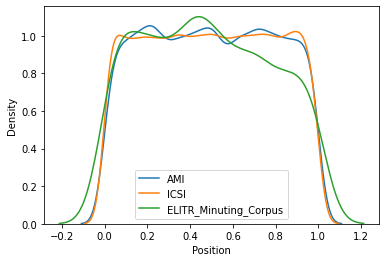

In [ ]:
"""# Graphs
### Distribution of small sentences in datasets
"""

ax=sns.kdeplot(df.position_small.loc['ami_transcripts'])
sns.kdeplot(df.position_small.loc['icsi_transcripts'])
sns.kdeplot(df.position_small.loc['automin_transcripts'])
ax.set(xlabel='Position')
ax.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
# ax.figure.savefig("out.png") 

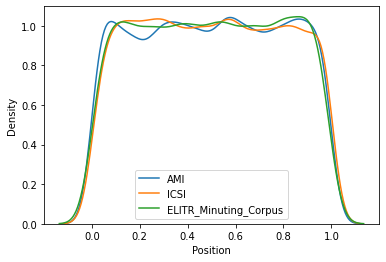

In [ ]:
"""### Distribution of big sentences in datasets """

ax=sns.kdeplot(df.position_big.loc['ami_transcripts'])
sns.kdeplot(df.position_big.loc['icsi_transcripts'])
sns.kdeplot(df.position_big.loc['automin_transcripts'])
ax.set(xlabel='Position')
ax.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
# ax.figure.savefig("out.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of speaker')]

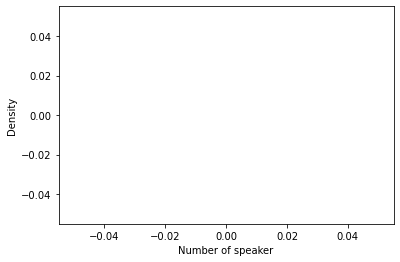

In [ ]:
"""## Speakers
### AMI
"""

ax=sns.kdeplot(ami_speakers, color='r')
ax.set(xlabel='Number of speaker', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of speaker')]

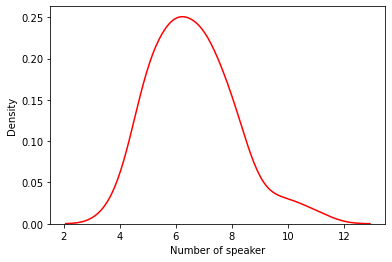

In [ ]:
"""### ICSI"""

ax=sns.kdeplot(participants_count_list, color='r')
ax.set(xlabel='Number of speaker', ylabel='Density')


In [ ]:

"""### AutoMin"""

#speaker_list=[len(i) for i in speaker_list]
ax=sns.kdeplot(speaker_list,  color='g')
ax.set(xlabel='Number of speaker', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of turns')]

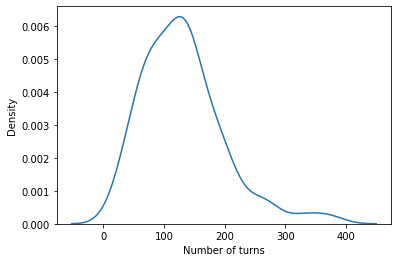

In [ ]:
"""## Turns
### AMI
"""

ax=sns.kdeplot(ami_turns)
ax.set(xlabel='Number of turns', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of turns')]

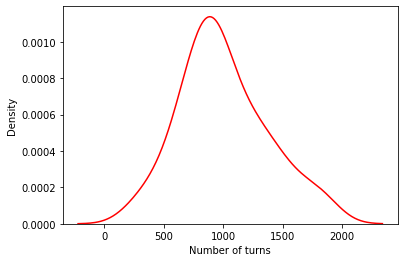

In [ ]:
"""### ICSI"""

ax=sns.kdeplot(icsi_turns, color='r')
ax.set(xlabel='Number of turns', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of turns')]

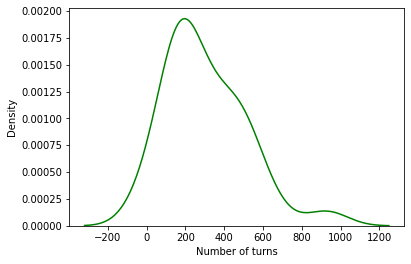

In [ ]:
"""### Automin"""

ax=sns.kdeplot(turns_list, color='g')
ax.set(xlabel='Number of turns', ylabel='Density')

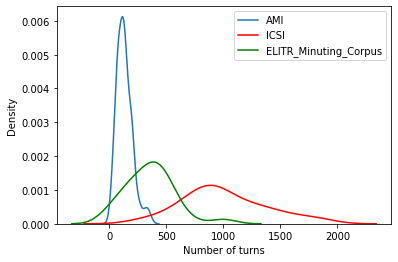

In [ ]:
"""### Combined"""

ax=sns.kdeplot(ami_turns)
sns.kdeplot(icsi_turns, color='r')
sns.kdeplot(turns_list, color='g')
ax.set(xlabel='Number of turns', ylabel='Density')
plt.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
ax.figure.savefig("out.png") 

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of dialogue tokens')]

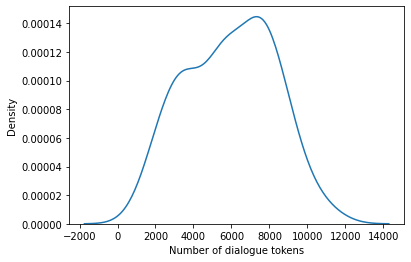

In [ ]:
"""## Dialogue tokens
### AMI
"""

# AMI
ax=sns.kdeplot(total_words_list_transcripts_ami)
ax.set(xlabel='Number of dialogue tokens', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of dialogue tokens')]

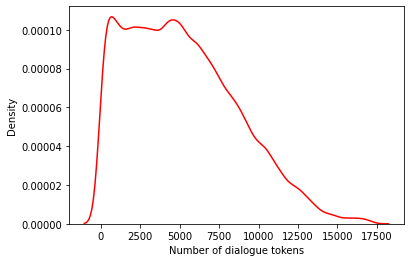

In [ ]:
"""### ICSI"""

ax=sns.kdeplot(total_words_list_transcripts_icsi, color='r')
ax.set(xlabel='Number of dialogue tokens', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of dialogue tokens')]

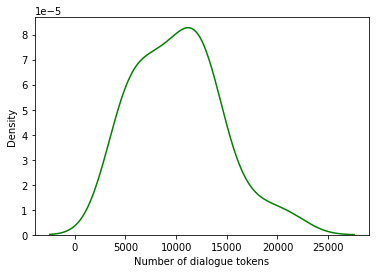

In [ ]:

"""### AutoMin"""

ax=sns.kdeplot(total_words_list_transcripts_automin, color='g')
ax.set(xlabel='Number of dialogue tokens', ylabel='Density')

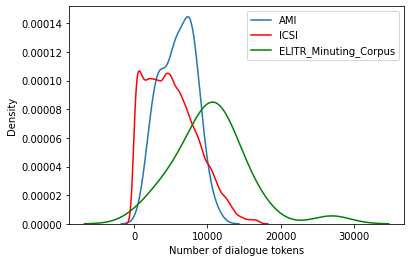

In [ ]:

"""### Combined"""

ax=sns.kdeplot(total_words_list_transcripts_ami)
sns.kdeplot(total_words_list_transcripts_icsi, color='r')
sns.kdeplot(total_words_list_transcripts_automin, color='g')
ax.set(xlabel='Number of dialogue tokens', ylabel='Density')
plt.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
ax.figure.savefig("out.png") 

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of summary tokens')]

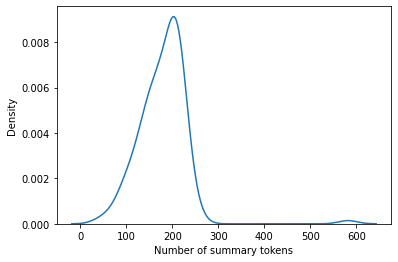

In [ ]:
"""## Summary tokens
### AMI Abstractive
"""

ax=sns.kdeplot(total_words_list_asum_ami)
ax.set(xlabel='Number of summary tokens', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of summary tokens')]

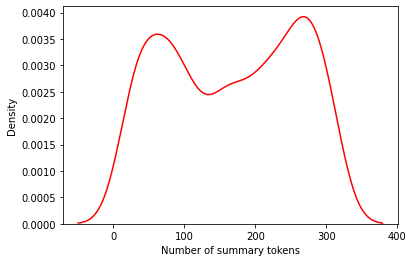

In [ ]:
"""### ICSI"""

ax=sns.kdeplot(total_words_list_asum_icsi, color='r')
ax.set(xlabel='Number of summary tokens', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of summary tokens')]

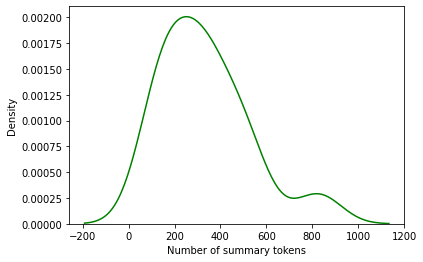

In [ ]:
"""### AutoMin"""

ax=sns.kdeplot(total_words_list_asum_automin, color='g')
ax.set(xlabel='Number of summary tokens', ylabel='Density')

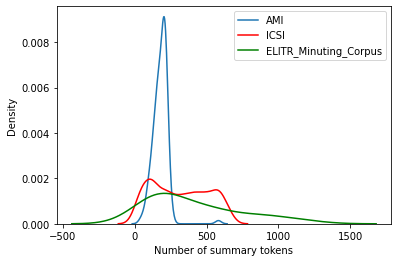

In [ ]:
"""### Combined"""

ax=sns.kdeplot(total_words_list_asum_ami)
sns.kdeplot(total_words_list_asum_icsi, color='r')
sns.kdeplot(total_words_list_asum_automin, color='g')
ax.set(xlabel='Number of summary tokens', ylabel='Density')
ax.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
ax.figure.savefig("out.png") 

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Position')]

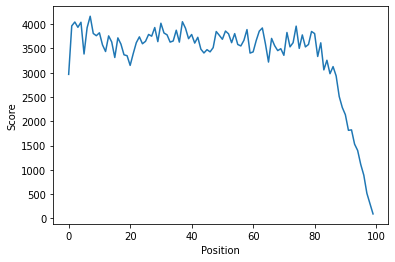

In [ ]:
"""## Position Bias
### AMI
"""

# ami

final_scores=[0]*100
for key in extractive_summary.keys():
    unique={}
    # creating vocab
    txt=nltk.sent_tokenize(extractive_summary[key])
    for index,sentence in enumerate(txt):
        temp=nltk.word_tokenize(sentence)
        temp=[word.lower() for word in temp]
        word_tokens_refined=[x for x in temp if x not in stopWords]
        for word in word_tokens_refined:
            if word not in unique: 
                unique[word]=1
            elif word in unique:
                unique[word]+=1
    sentence_scores=[]
    txt=nltk.sent_tokenize(transcripts[key])
    
    # scoring each sentence in transcript
    for index,sentence in enumerate(txt):
        score=0
        temp=nltk.word_tokenize(sentence)
        temp=[word.lower() for word in temp]
        word_tokens_refined=[x for x in temp if x not in stopWords]
        for word in word_tokens_refined:
            if word in unique: 
                score+=1
        sentence_scores.append(score)
    # creating 100 bins
    for index,i in enumerate(range(0,len(sentence_scores),(len(sentence_scores)//100)+1)):
        try:
            final_scores[index]+=sum(sentence_scores[i:i+len(sentence_scores)//100])
        except:
            final_scores[index]+=sum(sentence_scores[i:])
final_scores_ami=final_scores
ax=sns.lineplot(x=list(range(100)),y=final_scores)
ax.set(xlabel='Position', ylabel='Score')

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Position')]

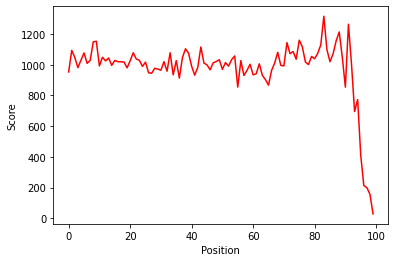

In [ ]:
"""### ICSI"""

# icsi

final_scores=[0]*100
for key in range(len(text_list)):
    unique={}
    # creating vocab
    txt=nltk.sent_tokenize(''.join(ab_sumtext_list[key]))
    for index,sentence in enumerate(txt):
        temp=nltk.word_tokenize(sentence)
        temp=[word.lower() for word in temp]
        word_tokens_refined=[x for x in temp if x not in stopWords]
        for word in word_tokens_refined:
            if word not in unique: 
                unique[word]=1
            elif word in unique:
                unique[word]+=1
    
    sentence_scores=[]
    txt=nltk.sent_tokenize(''.join(text_list[key]))
    
    # scoring each sentence in transcript
    for index,sentence in enumerate(txt):
        score=0
        temp=nltk.word_tokenize(sentence)
        temp=[word.lower() for word in temp]
        word_tokens_refined=[x for x in temp if x not in stopWords]
        for word in word_tokens_refined:
            if word in unique: 
                score+=1
        sentence_scores.append(score)
    # creating 100 bins
    for index,i in enumerate(range(0,len(sentence_scores),(len(sentence_scores)//100)+1)):
        try:
            final_scores[index]+=sum(sentence_scores[i:i+len(sentence_scores)//100])
        except:
            final_scores[index]+=sum(sentence_scores[i:])
final_scores_icsi=final_scores
ax=sns.lineplot(x=list(range(100)),y=final_scores, color='r')
ax.set(xlabel='Position', ylabel='Score')

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Position')]

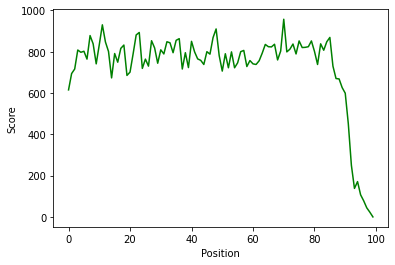

In [ ]:
"""### AutoMin"""

# automin


final_scores=[0]*100
for key in automin_summary.keys():
    unique={}
    # creating vocab
    for key1 in automin_summary[key].keys():
        txt=nltk.sent_tokenize(automin_summary[key][key1])
        for index,sentence in enumerate(txt):
            temp=nltk.word_tokenize(sentence)
            temp=[word.lower() for word in temp]
            word_tokens_refined=[x for x in temp if x not in stopWords]
            for word in word_tokens_refined:
                if word not in unique: 
                    unique[word]=1
                elif word in unique:
                    unique[word]+=1
    
    sentence_scores=[]
    try:
        txt=nltk.sent_tokenize(automin_transcripts[key])
        # scoring each sentence in transcript
        for index,sentence in enumerate(txt):
            score=0
            temp=nltk.word_tokenize(sentence)
            temp=[word.lower() for word in temp]
            word_tokens_refined=[x for x in temp if x not in stopWords]
            for word in word_tokens_refined:
                if word in unique: 
                    score+=1
            sentence_scores.append(score)
    except:
        pass
    # creating 100 bins
    for index,i in enumerate(range(0,len(sentence_scores),(len(sentence_scores)//100)+1)):
        try:
            final_scores[index]+=sum(sentence_scores[i:i+len(sentence_scores)//100])
        except:
            final_scores[index]+=sum(sentence_scores[i:])

final_scores_automin=final_scores
ax=sns.lineplot(x=list(range(100)),y=final_scores, color='g')
ax.set(xlabel='Position', ylabel='Score')

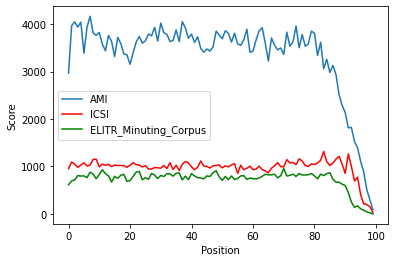

In [ ]:
"""### Combined"""

ax=sns.lineplot(x=list(range(100)),y=final_scores_ami)
sns.lineplot(x=list(range(100)),y=final_scores_icsi, color='r')
sns.lineplot(x=list(range(100)),y=final_scores_automin, color='g')
ax.set(xlabel='Position', ylabel='Score')
plt.legend(['AMI', 'ICSI', 'ELITR_Minuting_Corpus'])
ax.figure.savefig("out.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Standard Deviation between chisquare test values')]

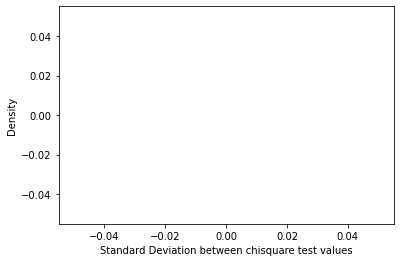

In [ ]:
"""## Inter Annotator Agreement"""

ax=sns.kdeplot(standard_deviations, color='r')
ax.set(xlabel='Standard Deviation between chisquare test values')

Error in: Graph for no. of speakers in AMI, Automin. Standard deviations calculations